In [2]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import os
import pandas as pd
import arrow
import xarray as xr 

In [3]:
basedir = '/results2/SalishSea/nowcast-green.202111/'
iY = 240
iX = 240
iZ = 10

start = dt.datetime(2017,1,1)
end = dt.datetime(2018,12,31)

timerange = arrow.Arrow.range('day',start,end)

for i,day in enumerate(timerange):
    dir1 = day.format('DDMMMYY').lower()
    ymd = day.format('YYYYMMDD')
    filename = 'SalishSea_1h_'+ ymd +'_' + ymd + '_grid_U.nc'
    fullfile = os.path.join(basedir,dir1,filename)
    u_vel = xr.open_dataset(fullfile)
    velocity = u_vel['vozocrtx'].isel(y=iY, x=iX).sel(depthu=iZ, method='nearest')
    u_vel.close()

    if i == 0:
        velocity_year = velocity.copy(deep=True)
        velocity.close()
    else:
        velocity_year = xr.concat([velocity_year, velocity], dim='time_counter')
        velocity.close()
    if i % 10 == 0:
        print (i)


0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720


In [4]:
velocity_year.to_netcdf('velocity_2018_VS.nc')

### Low pass filter

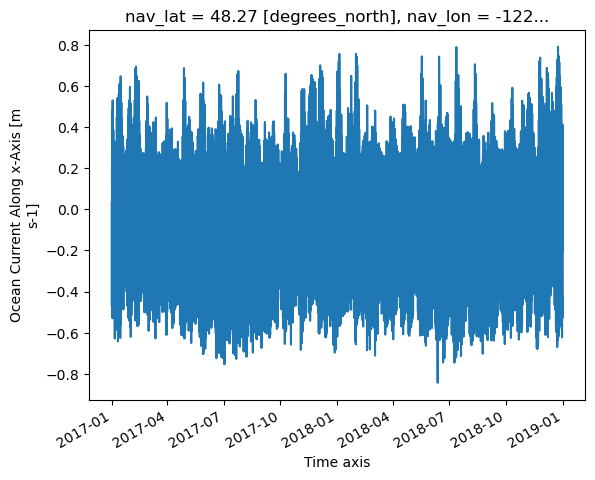

In [5]:
velocity_year.plot()

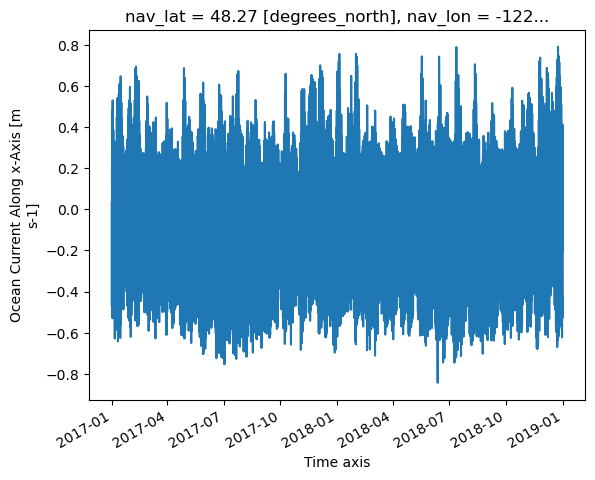

In [6]:
velocity = xr.open_dataset('velocity_2018_VS.nc')
velocity.vozocrtx.plot()

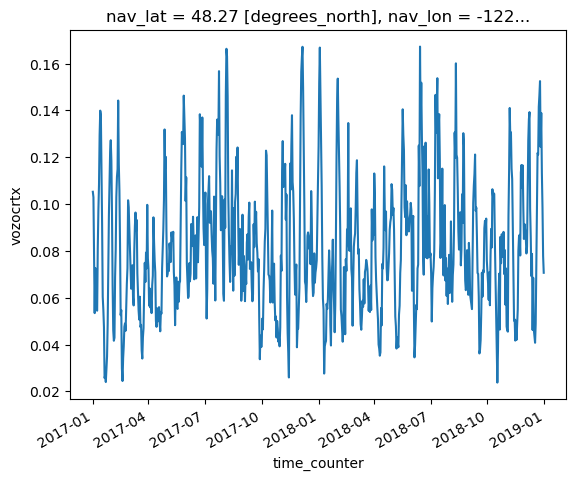

In [7]:
vel_squared = velocity*velocity

day_avg_tide_vel = vel_squared.resample(time_counter='1D').mean()
day_avg_tide_vel.vozocrtx.plot()

<AxesSubplot: xlabel='time_counter'>

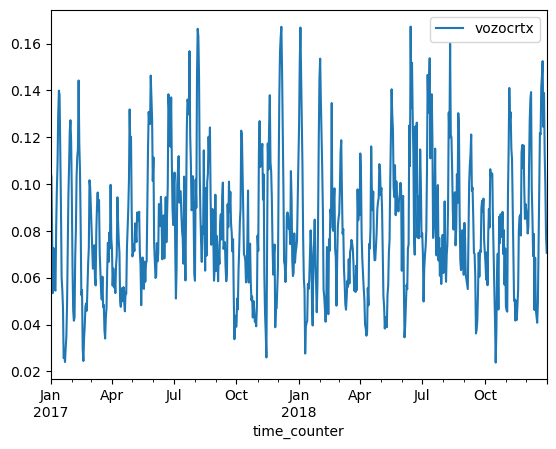

In [9]:
day_avg_tide_pd = day_avg_tide_vel.to_dataframe()
day_avg_tide_pd = day_avg_tide_pd.drop('depthu', axis=1)
day_avg_tide_pd = day_avg_tide_pd.drop('nav_lat', axis=1)
day_avg_tide_pd = day_avg_tide_pd.drop('nav_lon', axis=1)
day_avg_tide_pd.to_csv('day_avg_tide_pd_VS.csv')
day_avg_tide_pd.plot()

<AxesSubplot: xlabel='time_counter'>

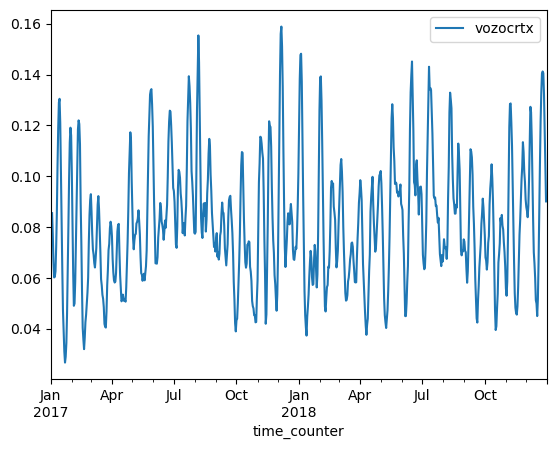

In [10]:
low_pass_tide = day_avg_tide_pd.rolling(4, center=True).mean()
low_pass_tide.to_csv('low_pass_tide_VS.csv')
low_pass_tide.plot()